# 気象庁高潮ガイダンスデータ

サンプルデータは[気象業務支援センター](http://www.jmbsc.or.jp/jp/online/file/f-online25100.html#guid)から取得

## データの構造

In [2]:
import xarray as xr
from datetime import datetime

In [3]:
gribfile = 'data/jma-surge-guidance/201910102100/Z__C_RJTD_20191010210000_SGM_GUID_Rjp_Ggis1km_FH01-39_EM00_grib2.bin'
ds = xr.open_dataset(gribfile, engine='cfgrib')

時間方向は `time` ではなく予報時間 `step` が読み込まれた．

In [4]:
ds

<xarray.Dataset>
Dimensions:     (latitude: 2592, longitude: 1840, step: 39)
Coordinates:
    time        datetime64[ns] ...
  * step        (step) timedelta64[ns] 01:00:00 02:00:00 ... 1 days 15:00:00
    surface     int64 ...
  * latitude    (latitude) float64 45.6 45.59 45.58 45.57 ... 24.02 24.01 24.01
  * longitude   (longitude) float64 122.9 122.9 122.9 ... 145.9 145.9 145.9
    valid_time  (step) datetime64[ns] ...
Data variables:
    paramId_0   (step, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             rjtd
    GRIB_centreDescription:  Japanese Meteorological Agency - Tokyo 
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             Japanese Meteorological Agency - Tokyo 
    history:                 2020-08-30T18:51:37 GRIB to CDM+CF via cfgrib-0....

## データのプロット

テーブルが登録されてないので変数名は適当に設定される．
東京湾付近をプロットしてみる

In [5]:
da_surge = ds.paramId_0

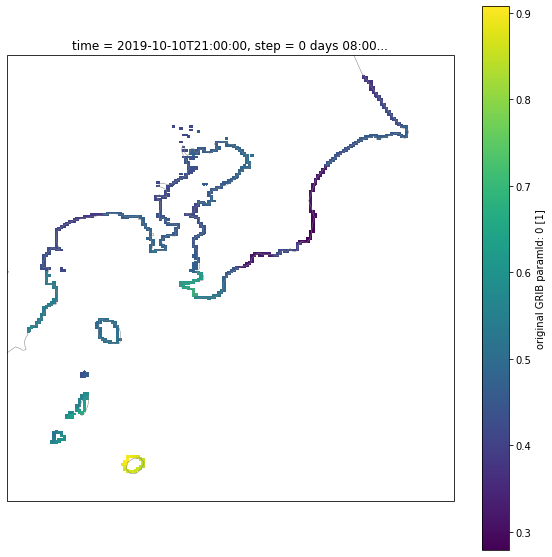

In [6]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='10m', color='gray', lw=0.5)

da_surge[7,:,:].sel(latitude=slice(36,34),longitude=slice(139,141)).plot(transform=ccrs.PlateCarree())

## 時系列

観測地点「東京」の時系列予想をプロットしてみる．

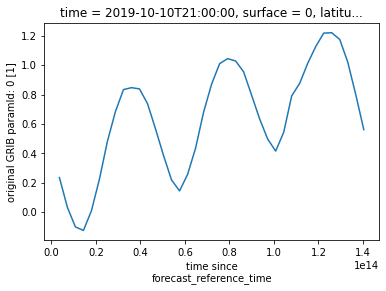

In [7]:
lat, lon = 34 + 55 / 60, 139 + 50 / 60
da_surge.sel(latitude=lat, longitude=lon, method='nearest').plot()